In [2]:
import nltk
import pandas as pd

In [3]:
Data = pd.read_csv("/Users/vamsi_5/EDIBULL/final2-labelled.csv")

In [5]:
Data.head()

,Unnamed: 0,Unnamed: 0.1,eventId,title,description,host,host id,Status
0,0,38,656943000000000,Taste of China,"Come to our event where there will be games, p...",USF Chinese Culture and Language Club,6.882421e+10,no
1,1,39,353969000000000,5th Annual Eid Extravaganza,"Come out for our BIGGEST event of the year, ho...",Bengali Students Association at USF,2.600000e+14,no
2,2,40,325140000000000,International Food Battle,DELICIOUS FREE FOOD. STUNNING PERFORMANCES. A ...,Bengali Students Association at USF,2.600000e+14,no
3,3,41,513864000000000,SIA: Diwali Dhamaka 2016,The long-anticipated event of the year is here...,Students of India Association - USF,3.730000e+14,no
4,4,42,286476000000000,BLACK OUT,★★★★★The UNOFFICIAL INDIAFEST AFTER PARTY !!!!...,Temi Kowobari,9.960000e+14,no


In [6]:
Data.groupby('Status').describe()

Unnamed: 0                                                             \
            count        mean        std   min     25%    50%     75%    max   
Status                                                                         
no          166.0  134.325301  93.879627   0.0   47.50  125.5  211.75  306.0   
yes         142.0  175.915493  77.561551  20.0  112.25  177.5  242.50  307.0   

       Unnamed: 0.1                  ...            eventId                \
              count        mean      ...                75%           max   
Status                               ...                                    
no            166.0  286.638554      ...       5.075760e+14  2.064900e+15   
yes           142.0  363.359155      ...       5.088410e+14  2.129780e+15   

       host id                                                          \
         count          mean           std           min           25%   
Status                                                                   
no       166.0  5.617009e+14  1.569521e+15  2.415733e+09  1.060000e+14   
yes      142.0  5.316645e+14  1.467158e+15  8.851161e+09  1.190000e+14   

                                                  
                 50%           75%           max  
Status                                            
no      2.015000e+14  5.015000e+14  1.020000e+16  
yes     2.015000e+14  5.050000e+14  1.020000e+16  

[2 rows x 32 columns]

In [7]:
Data['length'] = Data['description'].apply(len)
Data.head()

,Unnamed: 0,Unnamed: 0.1,eventId,title,description,host,host id,Status,length
0,0,38,656943000000000,Taste of China,"Come to our event where there will be games, p...",USF Chinese Culture and Language Club,6.882421e+10,no,228
1,1,39,353969000000000,5th Annual Eid Extravaganza,"Come out for our BIGGEST event of the year, ho...",Bengali Students Association at USF,2.600000e+14,no,2264
2,2,40,325140000000000,International Food Battle,DELICIOUS FREE FOOD. STUNNING PERFORMANCES. A ...,Bengali Students Association at USF,2.600000e+14,no,1419
3,3,41,513864000000000,SIA: Diwali Dhamaka 2016,The long-anticipated event of the year is here...,Students of India Association - USF,3.730000e+14,no,1672
4,4,42,286476000000000,BLACK OUT,★★★★★The UNOFFICIAL INDIAFEST AFTER PARTY !!!!...,Temi Kowobari,9.960000e+14,no,845


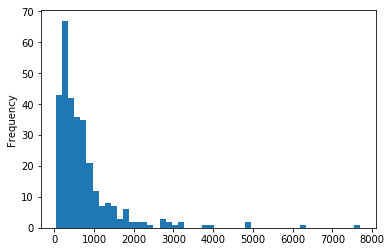

In [10]:
# In[10]:
# Data Visulaization using matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

get_ipython().magic('matplotlib inline')
# In[11]:
Data['length'].plot(bins=50, kind='hist')

#The length of the description is mostly between 0 and 1000.

In [17]:
# Text Preprocessing
import string
# Removing punctuations
mess = 'Sample message! Notice: it has punctuation.'
# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]
# Join the characters again to form the string.
nopunc = ''.join(nopunc)
nopunc[0]

'S'

In [18]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words




['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [19]:
nopunc.split()
# In[18]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
# In[19]:
clean_mess



['Sample', 'message', 'Notice', 'punctuation']

In [20]:
#GENERIC FUNCTION to do remove the punctuations and stop words.
def text_process(mess):

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [21]:
Data['description'].head()

0    Come to our event where there will be games, p...
1    Come out for our BIGGEST event of the year, ho...
2    DELICIOUS FREE FOOD. STUNNING PERFORMANCES. A ...
3    The long-anticipated event of the year is here...
4    ★★★★★The UNOFFICIAL INDIAFEST AFTER PARTY !!!!...
Name: description, dtype: object

In [23]:
Data['description'].head(5).apply(text_process)

0    [Come, event, games, performances, best, FREE,...
1    [Come, BIGGEST, event, year, hosted, BSA, 20, ...
2    [DELICIOUS, FREE, FOOD, STUNNING, PERFORMANCES...
3    [longanticipated, event, year, Students, India...
4    [★★★★★The, UNOFFICIAL, INDIAFEST, PARTY, ★★★★★...
Name: description, dtype: object

In [36]:
# Doing vectorization 
from sklearn.feature_extraction.text import CountVectorizer
# In[25]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(Data['description'])
# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

6893


In [28]:
message4 = Data['description'][3]
print(message4)
# In[28]:
#Checking the transformed vector representation of message number 4
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

The long-anticipated event of the year is here!

Students of India Association is excited to present, along with our collaborating organizations, Diwali Dhamaka 2016! 
Come witness mind-blowing performances by the most talented Desis on campus and become part of an event that showcases our awesome and vibrant culture in the most Desi way possible. You also won't want to miss out on our fashion show called 'Festival Hungama'! Top it all off with a warm, delicious, and hearty Indian Dinner, and you have an experience like no other!

We would like to thank our collaborating organizations, namely:
Beta Chi Theta
Bengali Students Association
Bull Bhangra
Delta Epsilon Psi
International Center for Cultural Studies
International Students Association
Latin American Students Association
Sigma Beta Rho
Saffron Indian Cuisine
The Ensembull
USF Amar
USF Naach

And a special thank you to our Chief Collaborator:
American But Cultured Desi's: ABCD

Community Sponsor:
Puja Travels, Int. 

Catered by: 

In [39]:
#Applyting Vectorization to all the messages of dataset
messages_bow = bow_transformer.transform(Data['description'])
messages_bow

<308x6893 sparse matrix of type '<class 'numpy.int64'>'
	with 18725 stored elements in Compressed Sparse Row format>

In [40]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (308, 6893)
Amount of Non-Zero occurences:  18725


In [43]:
#Using TFIDF (Term Frequncy - Inverse Document Frequency) method to findtf-idf weight of words in the message to understand their importance
#TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
#IDF(t) = log_e(Total number of documents / Number of documents with term t in it).
#Tf-idf weight is the product of these quantities.

42

In [44]:
#Applying TF-IDF for message 4 and printing values.
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 6759)	0.04876308780586087
  (0, 6722)	0.056671837889546745
  (0, 6706)	0.08070966217069045
  (0, 6700)	0.0887559816637984
  (0, 6654)	0.056671837889546745
  (0, 6643)	0.0887559816637984
  (0, 6640)	0.05887331171742003
  (0, 6603)	0.08422452952104752
  (0, 6360)	0.1614193243413809
  (0, 6319)	0.0887559816637984
  (0, 6172)	0.06449151178530098
  (0, 6081)	0.08422452952104752
  (0, 6079)	0.056001455983892785
  (0, 5831)	0.06829019937747365
  (0, 5791)	0.05414618504275938
  (0, 5765)	0.08422452952104752
  (0, 5718)	0.04352244076716893
  (0, 5669)	0.09514270474768272
  (0, 5644)	0.056001455983892785
  (0, 5615)	0.0778378064371632
  (0, 5506)	0.056671837889546745
  (0, 5454)	0.05887331171742003
  (0, 5406)	0.11620957740283333
  (0, 5383)	0.04444026914042776
  (0, 5288)	0.0887559816637984
  :	:
  (0, 1083)	0.06829019937747365
  (0, 1005)	0.08422452952104752
  (0, 1003)	0.0778378064371632
  (0, 1002)	0.1775119633275968
  (0, 921)	0.06691963121052799
  (0, 909)	0.03416510553062238
  (0, 8

In [50]:
#Checking the weight of some random words from the messages.
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['Free']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.299354072412599
4.536116699561527


In [52]:
#Applying the tfidf to all the messages.
description_tfidf = tfidf_transformer.transform(messages_bow)
print(description_tfidf.shape)

(308, 6893)


In [54]:
from sklearn.naive_bayes import MultinomialNB
Food_detect_model = MultinomialNB().fit(description_tfidf, Data['Status'])

In [56]:
print('predicted:', Food_detect_model.predict(tfidf4)[0])
print('expected:', Data.Status[3])

predicted: no
expected: no


In [57]:
# MODEL EVALUATION
# Applying the model to the entire dataset.
all_predictions = Food_detect_model.predict(description_tfidf)
print(all_predictions)


['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'yes'
 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'no' 'yes'
 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'no'
 'no' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'yes'
 'no' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes'
 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'yes'
 'yes' 'no' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'no'
 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'no'
 'no' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes'
 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'yes'

In [58]:
# USing Scikit Learn's Classification_report to check how our model performed.
# Precsion = TP/FP+TP, Recall= TP/TP+FN
from sklearn.metrics import classification_report
print (classification_report(Data['Status'], all_predictions))


             precision    recall  f1-score   support

         no       0.98      0.95      0.96       166
        yes       0.95      0.97      0.96       142

avg / total       0.96      0.96      0.96       308



In [63]:
#Splitting the data into Training and testing
from sklearn.model_selection import train_test_split

des_train, des_test, status_train, status_test = train_test_split(Data['description'], Data['Status'], test_size=0.2)

print(len(des_train), len(des_test), len(des_train) + len(des_test))

des_test


246 62 308


279    Get ready to SPRING into the new semester with...
287    Feeling Chilly? Stop by the Hillel table for f...
155    Come to the Centre Gallery's Open Mic Night th...
14     Buy your tickets NOW at http://www.usfpamsa.or...
188    Hey Everyone! FWEA West Coast Chapter is hosti...
125    The USF Botanical Gardens is hosting its first...
6      Sunset Events and Disco Donnie Presents in Ass...
30     Calling all poets, musicians, dancers, musicia...
18     Join us in MSC 3306 on Wednesday, May 24th at ...
281    On Fridays, the University of South Florida Bo...
118    Movies on the Lawn is back with the summer blo...
191    GREETINGS!\n\nThe Vietnamese Student Associati...
104    A presentation by the USF Community Emergency ...
218    The biggest event of the semester is here. You...
182    Join us in the Patel Center for Global Solutio...
283    Welcome back Video Game Club! Take a break fro...
9      Sunset Events and Disco Donnie Presents in Ass...
36     *EMAIL ADDRESSES AND DRA

In [67]:
# Using Pipeline to perform sequence of transformations
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

# In[42]:
pipeline.fit(des_train,status_train) # Training the data

# In[43]:
predictions = pipeline.predict(des_test) # Predictions on Test Data

print(predictions)

# In[44]:
print(classification_report(predictions,status_test)) # Final Evaluation of the complete model

['no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes'
 'yes' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'no'
 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no'
 'yes' 'no' 'no' 'yes' 'no' 'yes' 'no']
             precision    recall  f1-score   support

         no       0.84      0.62      0.71        42
        yes       0.48      0.75      0.59        20

avg / total       0.72      0.66      0.67        62

